In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn    
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('DLPS Generated Data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.

df=pd.DataFrame.from_records(rows)
df

[['Index', '1st', '2nd sensor', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th', 'ERROR VALUES(um)'], ['1', '0.135', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.044', '0.044', '0.088', '0.066', '0.047'], ['2', '1.57', '1.614', '1.434', '0.645', '0.394', '0.358', '0.391', '0.231', '0.32', '0.301', '0.265', '0.309', '0.287', '0.398', '0.287', '0.615'], ['3', '3.857', '3.901', '3.728', '1.613', '0.932', '0.538', '0.693', '0.64', '0.587', '0.478', '0.549', '0.795', '0.419', '0.929', '0.132', '2.459'], ['4', '5.874', '6.099', '5.125', '2.294', '1.505', '0.43', '0.587', '0.711', '0.498', '0.531', '0.655', '1.015', '0.508', '0.177', '0.287', '3.736'], ['5', '6.726', '7.265', '6.022', '2.832', '2.043', '0.717', '0.711', '0.889', '0.871', '0.619', '0.69', '1.17', '0.552', '1.195', '0.287', '5.06'], ['6', '6.996', '7.713', '6.38', '3.548', '2.401', '1.147', '0.996', '1.191', '1.084', '0.956', '0.903', '1.391', '0.861', '0.398', '0.331', '5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Index,1st,2nd sensor,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th,14th,15th,ERROR VALUES(um)
1,1,0.135,0,0,0,0,0,0,0,0,0,0,0.044,0.044,0.088,0.066,0.047
2,2,1.57,1.614,1.434,0.645,0.394,0.358,0.391,0.231,0.32,0.301,0.265,0.309,0.287,0.398,0.287,0.615
3,3,3.857,3.901,3.728,1.613,0.932,0.538,0.693,0.64,0.587,0.478,0.549,0.795,0.419,0.929,0.132,2.459
4,4,5.874,6.099,5.125,2.294,1.505,0.43,0.587,0.711,0.498,0.531,0.655,1.015,0.508,0.177,0.287,3.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,10.448,13.453,17.634,14.301,12.258,7.24,6.809,6.756,6.844,5.009,4.69,8.962,4.547,2.035,1.921,26.716
67,67,9.462,13.004,17.312,14.373,11.434,7.025,6.738,6.684,6.649,5.009,4.655,8.808,4.481,2.788,1.965,26.574
68,68,8.879,12.152,16.918,14.444,10.932,7.133,6.596,6.631,6.578,4.85,4.796,8.587,4.481,3.363,2.318,26.764
69,69,8.43,11.839,16.308,14.48,10.753,6.953,6.507,6.613,6.489,4.814,4.673,8.477,4.437,3.319,2.075,25.156


In [ ]:
df=df.drop([0],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1st,2nd sensor,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th,14th,15th,ERROR VALUES(um)
1,0.135,0,0,0,0,0,0,0,0,0,0,0.044,0.044,0.088,0.066,0.047
2,1.57,1.614,1.434,0.645,0.394,0.358,0.391,0.231,0.32,0.301,0.265,0.309,0.287,0.398,0.287,0.615
3,3.857,3.901,3.728,1.613,0.932,0.538,0.693,0.64,0.587,0.478,0.549,0.795,0.419,0.929,0.132,2.459
4,5.874,6.099,5.125,2.294,1.505,0.43,0.587,0.711,0.498,0.531,0.655,1.015,0.508,0.177,0.287,3.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,10.448,13.453,17.634,14.301,12.258,7.24,6.809,6.756,6.844,5.009,4.69,8.962,4.547,2.035,1.921,26.716
67,9.462,13.004,17.312,14.373,11.434,7.025,6.738,6.684,6.649,5.009,4.655,8.808,4.481,2.788,1.965,26.574
68,8.879,12.152,16.918,14.444,10.932,7.133,6.596,6.631,6.578,4.85,4.796,8.587,4.481,3.363,2.318,26.764
69,8.43,11.839,16.308,14.48,10.753,6.953,6.507,6.613,6.489,4.814,4.673,8.477,4.437,3.319,2.075,25.156


In [ ]:
X=df[1:].drop([16],axis=1).to_numpy()
X

array([['0.135', '0', '0', ..., '0.044', '0.088', '0.066'],
       ['1.57', '1.614', '1.434', ..., '0.287', '0.398', '0.287'],
       ['3.857', '3.901', '3.728', ..., '0.419', '0.929', '0.132'],
       ...,
       ['8.879', '12.152', '16.918', ..., '4.481', '3.363', '2.318'],
       ['8.43', '11.839', '16.308', ..., '4.437', '3.319', '2.075'],
       ['7.623', '11.256', '15.412', ..., '4.371', '3.009', '1.898']],
      dtype=object)

In [ ]:
X[:,1]

array(['0', '1.614', '3.901', '6.099', '7.265', '7.713', '8.744', '9.148',
       '9.91', '10.538', '11.031', '11.256', '11.57', '11.614', '12.108',
       '12.108', '12.556', '12.96', '12.825', '12.915', '13.408',
       '13.632', '13.901', '14.126', '14.126', '13.991', '13.139',
       '12.377', '11.794', '10.807', '10.045', '10.09', '10.852',
       '12.063', '12.556', '13.677', '14.126', '14.395', '14.709',
       '14.843', '14.978', '15.112', '15.291', '15.874', '16.009',
       '15.695', '15.785', '16.099', '16.099', '16.099', '16.413',
       '16.188', '16.233', '16.233', '16.457', '16.906', '16.816',
       '16.771', '16.861', '16.906', '17.623', '17.309', '16.502',
       '15.157', '14.305', '13.453', '13.004', '12.152', '11.839',
       '11.256'], dtype=object)

In [ ]:
X1=df[1].to_numpy() #first sensor
y=df[1:][16].to_numpy() # error values
#X=X.iloc[1:]
#y=y.iloc[1:]
X1

array(['1st', '0.135', '1.57', '3.857', '5.874', '6.726', '6.996',
       '8.386', '8.386', '9.462', '10.09', '10.673', '10.852', '10.762',
       '11.256', '12.063', '11.749', '12.197', '12.691', '12.242',
       '12.287', '12.96', '13.004', '13.229', '13.184', '13.274',
       '13.632', '11.928', '10.628', '9.238', '8.251', '7.13', '7.982',
       '9.552', '11.031', '12.197', '13.049', '13.094', '13.722',
       '14.081', '13.812', '14.305', '14.26', '14.126', '14.933',
       '15.247', '14.798', '14.709', '15.561', '15.022', '14.798',
       '15.695', '15.247', '14.664', '15.202', '16.009', '16.323',
       '15.695', '15.74', '15.919', '16.054', '16.323', '16.726',
       '16.054', '13.184', '11.839', '10.448', '9.462', '8.879', '8.43',
       '7.623'], dtype=object)

In [ ]:
X = X.astype(float)
y = y.astype(float)
y

array([ 0.047,  0.615,  2.459,  3.736,  5.06 ,  5.958,  6.478,  7.187,
        7.708,  8.18 ,  8.606,  9.173, 10.356, 11.632, 12.483, 13.665,
       14.895, 16.266, 16.928, 17.306, 17.921, 18.441, 18.867, 19.103,
       19.292, 19.482, 19.907, 20.333, 21.089, 21.184, 21.231, 21.231,
       20.664, 17.685, 15.462, 13.287, 14.186, 14.8  , 15.226, 16.172,
       17.448, 18.536, 19.245, 19.576, 20.285, 20.758, 20.711, 21.184,
       21.846, 22.366, 22.602, 23.17 , 23.406, 23.926, 24.21 , 24.494,
       24.494, 24.683, 24.778, 24.872, 25.345, 25.44 , 25.487, 25.96 ,
       26.149, 26.716, 26.574, 26.764, 25.156, 23.832])

In [ ]:
#X=X.iloc[1:]
#y=y.iloc[1:]
#X

In [ ]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#df1 = ss.fit_transform(df)
#df1

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[ 6.996,  7.713,  6.38 ,  3.548,  2.401,  1.147,  0.996,  1.191,
         1.084,  0.956,  0.903,  1.391,  0.861,  0.398,  0.331],
       [ 1.57 ,  1.614,  1.434,  0.645,  0.394,  0.358,  0.391,  0.231,
         0.32 ,  0.301,  0.265,  0.309,  0.287,  0.398,  0.287],
       [ 0.135,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.044,  0.044,  0.088,  0.066],
       [13.184, 14.126, 12.509,  9.247,  8.172,  4.624,  4.409,  4.604,
         4.284,  4.336,  3.788,  5.563,  3.576,  0.177,  1.038],
       [ 9.462,  9.91 ,  8.423,  4.946,  3.441,  1.9  ,  1.796,  2.08 ,
         1.742,  1.593,  1.487,  1.921,  1.369,  0.841,  0.508],
       [15.247, 16.009, 14.695, 10.896,  9.857,  5.771,  5.938,  6.151,
         5.813,  5.504,  5.097,  7.704,  4.79 ,  2.168,  1.876],
       [ 5.874,  6.099,  5.125,  2.294,  1.505,  0.43 ,  0.587,  0.711,
         0.498,  0.531,  0.655,  1.015,  0.508,  0.177,  0.287],
       [16.009, 16.457, 15.735, 11.9  , 1

In [ ]:
import timeit
start = timeit.default_timer()

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,confusion_matrix

from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)


stop = timeit.default_timer()
print('Time: ', stop - start)  

y_pred

Time:  0.0026620889984769747


array([ 2.02289245, 18.18210821, 23.92639056, 15.19640037, 17.39583514,
       13.88010003, 11.23127487, 19.40198951, 28.55024845, 18.06576021,
       25.19704739,  3.60235337, 23.1565158 , 22.50729413, 28.97551408,
       22.88446862, 25.99350735, 13.81357369, 17.52348644, 20.68919926,
       19.64216944])

In [ ]:
y_test

array([ 2.459, 15.226, 23.406, 18.441, 18.867, 13.665, 11.632, 19.482,
       26.149, 17.685, 25.44 ,  5.06 , 24.778, 22.366, 26.716, 20.711,
       25.156, 16.266, 19.245, 21.089, 21.231])

In [ ]:
print('Coefficients: \n', reg.coef_)
# mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Coefficients: 
 [ 0.55259533 -2.16105171  2.49296299  0.11906999  1.83933575  0.926854
 -1.55354896  1.29087649 -5.11349739 -0.02964844 -0.28544158 -0.24971252
  4.08630524 -0.7477732   0.92063501]
Mean squared error: 2.62


# **KMeans (helping us understand the data)**

In [ ]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmean.cluster_centers_

array([[11.37522222, 12.2987037 , 11.90892593,  8.96981481,  7.17240741,
         4.27322222,  4.05533333,  4.09611111,  3.95196296,  3.59033333,
         3.27440741,  5.07481481,  3.08881481,  0.65540741,  0.84533333],
       [ 5.71022222,  6.04377778,  5.18133333,  2.736     ,  1.85177778,
         0.93988889,  0.89677778,  1.04088889,  0.94211111,  0.78666667,
         0.78666667,  1.094     ,  0.71377778,  0.75222222,  0.29677778],
       [14.05835294, 15.397     , 15.15597059, 12.01761765, 10.55558824,
         6.10164706,  6.2165    ,  6.41352941,  5.95555882,  5.63047059,
         5.13117647,  7.9555    ,  4.911     ,  2.04582353,  1.83938235]])

In [ ]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

Cluster 1 Inertia 6217.689619542856
Cluster 2 Inertia 2334.42264775
Cluster 3 Inertia 1377.9274767777779
Cluster 4 Inertia 983.6828730000001
Cluster 5 Inertia 678.0233520567765
Cluster 6 Inertia 529.1678840282559
Cluster 7 Inertia 404.2025413902381
Cluster 8 Inertia 318.7614747753247
Cluster 9 Inertia 266.7950898190476
Cluster 10 Inertia 226.71162306818178
Cluster 11 Inertia 194.85615743484846
Cluster 12 Inertia 176.09496402532466
Cluster 13 Inertia 150.90639980266954
Cluster 14 Inertia 131.2423247360029
Cluster 15 Inertia 113.65946627171715
Cluster 16 Inertia 104.63119243333333
Cluster 17 Inertia 96.33473491666666
Cluster 18 Inertia 91.9350621904762
Cluster 19 Inertia 84.3915916


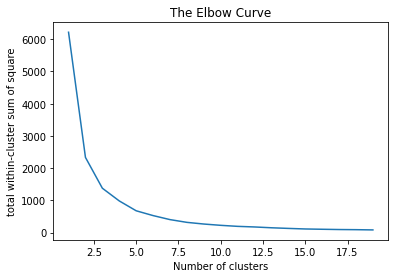

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  wcss.append(kmeans.inertia_)
  print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("total within-cluster sum of square")
plt.show()

Hence, ideal number of clusters= 6 or 7

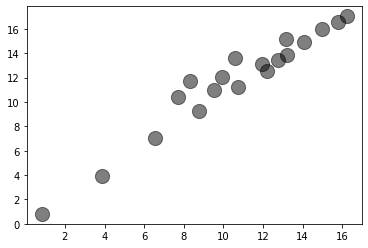

In [ ]:
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


PCA

1.   Found out new, more informative features. These collectively express 99.8% variance
2.   Now used Linear regression on those features



In [ ]:
import timeit
start = timeit.default_timer()

#PCA
from sklearn.decomposition import PCA

comp=100
pca=PCA(n_components=5)
pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
#X_train_pca.shape

stop = timeit.default_timer()
print('Time: ', stop - start)  

X_train_pca.shape

Time:  0.0022057729947846383


(49, 5)

In [ ]:
X_train_pca

array([[ 1.58716575e+01, -8.60754810e-01, -5.75137364e-01,
         3.02619306e-01, -1.61270283e-02],
       [ 2.49613372e+01,  2.83810913e+00,  2.83195447e+00,
         1.40311397e-01, -4.44555628e-01],
       [ 2.75032208e+01,  3.76405843e+00,  3.58863516e+00,
        -2.41858289e-01, -6.04384131e-01],
       [-5.85875482e-01, -1.68315878e+00, -4.19538952e-01,
        -1.04902756e+00,  3.00952832e-02],
       [ 1.14170883e+01, -2.01995980e+00, -1.28391806e+00,
         6.34153419e-01,  1.12053507e-01],
       [-6.61030082e+00, -1.45156541e+00,  4.91860593e-01,
         5.78330476e-01, -2.17722861e-01],
       [ 1.88594665e+01, -5.45685520e-01,  1.63793850e-03,
         2.79168655e-01, -1.58748388e-01],
       [-8.59193701e+00, -1.23293316e+00,  2.09767877e-01,
         1.18533296e+00, -3.01105575e-01],
       [ 3.41693527e+00, -1.88388710e+00, -8.00573474e-01,
        -2.18179779e-01,  5.13445809e-01],
       [-6.00621133e+00, -1.01445502e+00,  8.88198110e-02,
         1.00202702e+00

In [ ]:
eigenvalues = pca.explained_variance_
eigenvalues

array([85.92069838,  7.52405182,  1.30658774,  0.49407062,  0.14094624])

In [ ]:
cov_matrix = pca
cov_matrix.fit(X_train)
variance = cov_matrix.explained_variance_ratio_ 
vars=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)
vars #cumulative sum of variance
#Clearly first 5 features give almost 100% variance
#SO WE CAN SAFELY TAKE ONLY FIRST 5 FEATURES(Sensors)

array([89.8, 97.7, 99.1, 99.6, 99.7])

In [ ]:
#Now using Linear regrgession on the PCA components

In [ ]:
import timeit
start = timeit.default_timer()

reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train_pca, y_train)

# Make predictions using the testing set
y_pred_pca = reg.predict(X_test_pca)


stop = timeit.default_timer()
print('Time: ', stop - start)

y_pred_pca

Time:  0.0009752780024427921


array([ 2.19696521, 19.72931621, 21.45832451, 16.12240969, 16.16072252,
       12.9895325 , 11.49685066, 18.31740545, 27.32950299, 17.29216634,
       24.56886993,  4.61854745, 23.3261665 , 21.53678009, 27.33818104,
       20.90434181, 26.00633383, 14.35410391, 20.19483159, 21.08906522,
       18.70285059])

In [ ]:
y_test

array([ 2.459, 15.226, 23.406, 18.441, 18.867, 13.665, 11.632, 19.482,
       26.149, 17.685, 25.44 ,  5.06 , 24.778, 22.366, 26.716, 20.711,
       25.156, 16.266, 19.245, 21.089, 21.231])

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_pca))

Mean squared error: 2.67


DATA VISUALIZATON: Let's plot some graphs!

Text(0, 0.5, 'Measured Temperature variation for each sensor')

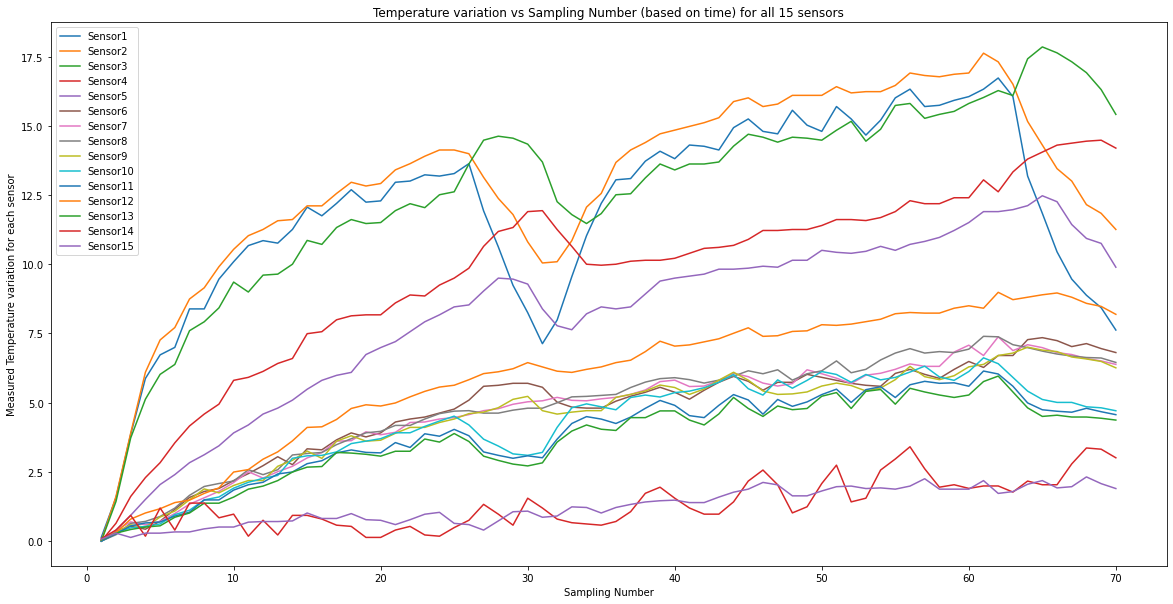

In [ ]:
plt.figure(figsize=(20,10))
x1=np.arange(1,71,1)

for i in range(0,15):
  plt.plot(x1, X[:,i], label='Sensor'+str(i+1))

plt.legend()
plt.title("Temperature variation vs Sampling Number (based on time) for all 15 sensors")
plt.xlabel('Sampling Number')
plt.ylabel('Measured Temperature variation for each sensor')

Text(0, 0.5, 'Error')

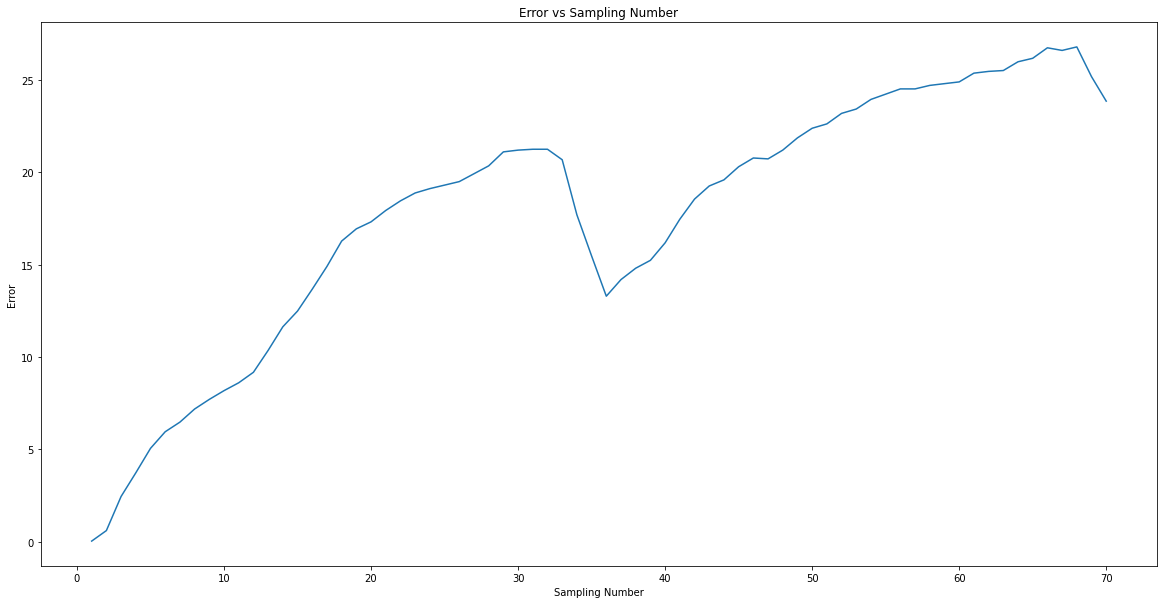

In [ ]:
plt.figure(figsize=(20,10))
x1=np.arange(1,71,1)

plt.plot(x1, y)

plt.title("Error vs Sampling Number")
plt.xlabel('Sampling Number')
plt.ylabel('Error')

Choose best sensors

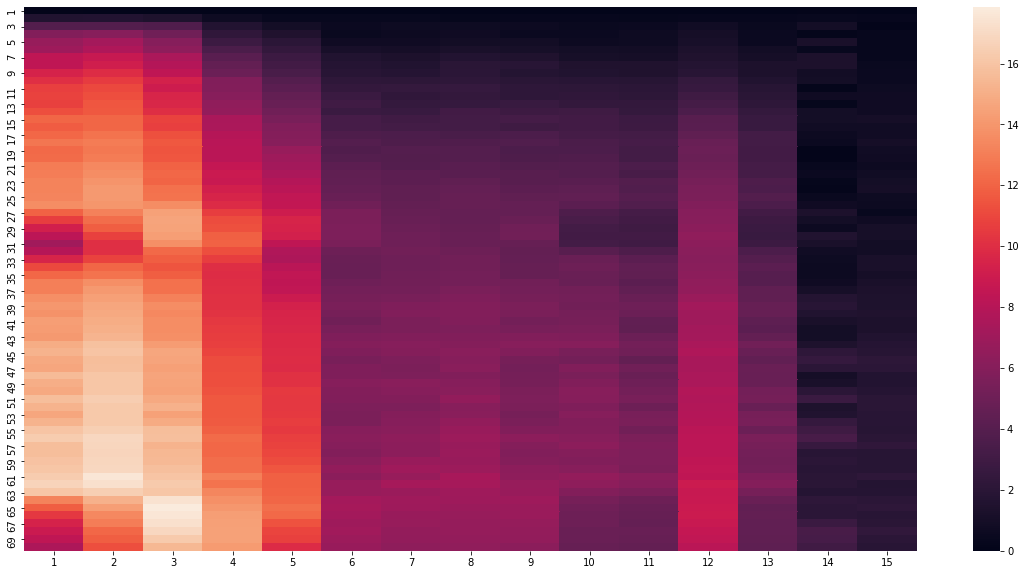

In [ ]:
plt.figure(figsize=(20,10))
df1=df.drop([16], axis=1).drop([0]) 
df1 = df1.astype(float)
sns.heatmap(df1)
#we can see from here that first few sensors have most variation in values, hence seem most informative! Choose first 5 sensors(most relevant)

In [ ]:
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.135,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.044,0.044,0.088,0.066
2,1.570,1.614,1.434,0.645,0.394,0.358,0.391,0.231,0.320,0.301,0.265,0.309,0.287,0.398,0.287
3,3.857,3.901,3.728,1.613,0.932,0.538,0.693,0.640,0.587,0.478,0.549,0.795,0.419,0.929,0.132
4,5.874,6.099,5.125,2.294,1.505,0.430,0.587,0.711,0.498,0.531,0.655,1.015,0.508,0.177,0.287
5,6.726,7.265,6.022,2.832,2.043,0.717,0.711,0.889,0.871,0.619,0.690,1.170,0.552,1.195,0.287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,10.448,13.453,17.634,14.301,12.258,7.240,6.809,6.756,6.844,5.009,4.690,8.962,4.547,2.035,1.921
67,9.462,13.004,17.312,14.373,11.434,7.025,6.738,6.684,6.649,5.009,4.655,8.808,4.481,2.788,1.965
68,8.879,12.152,16.918,14.444,10.932,7.133,6.596,6.631,6.578,4.850,4.796,8.587,4.481,3.363,2.318
69,8.430,11.839,16.308,14.480,10.753,6.953,6.507,6.613,6.489,4.814,4.673,8.477,4.437,3.319,2.075


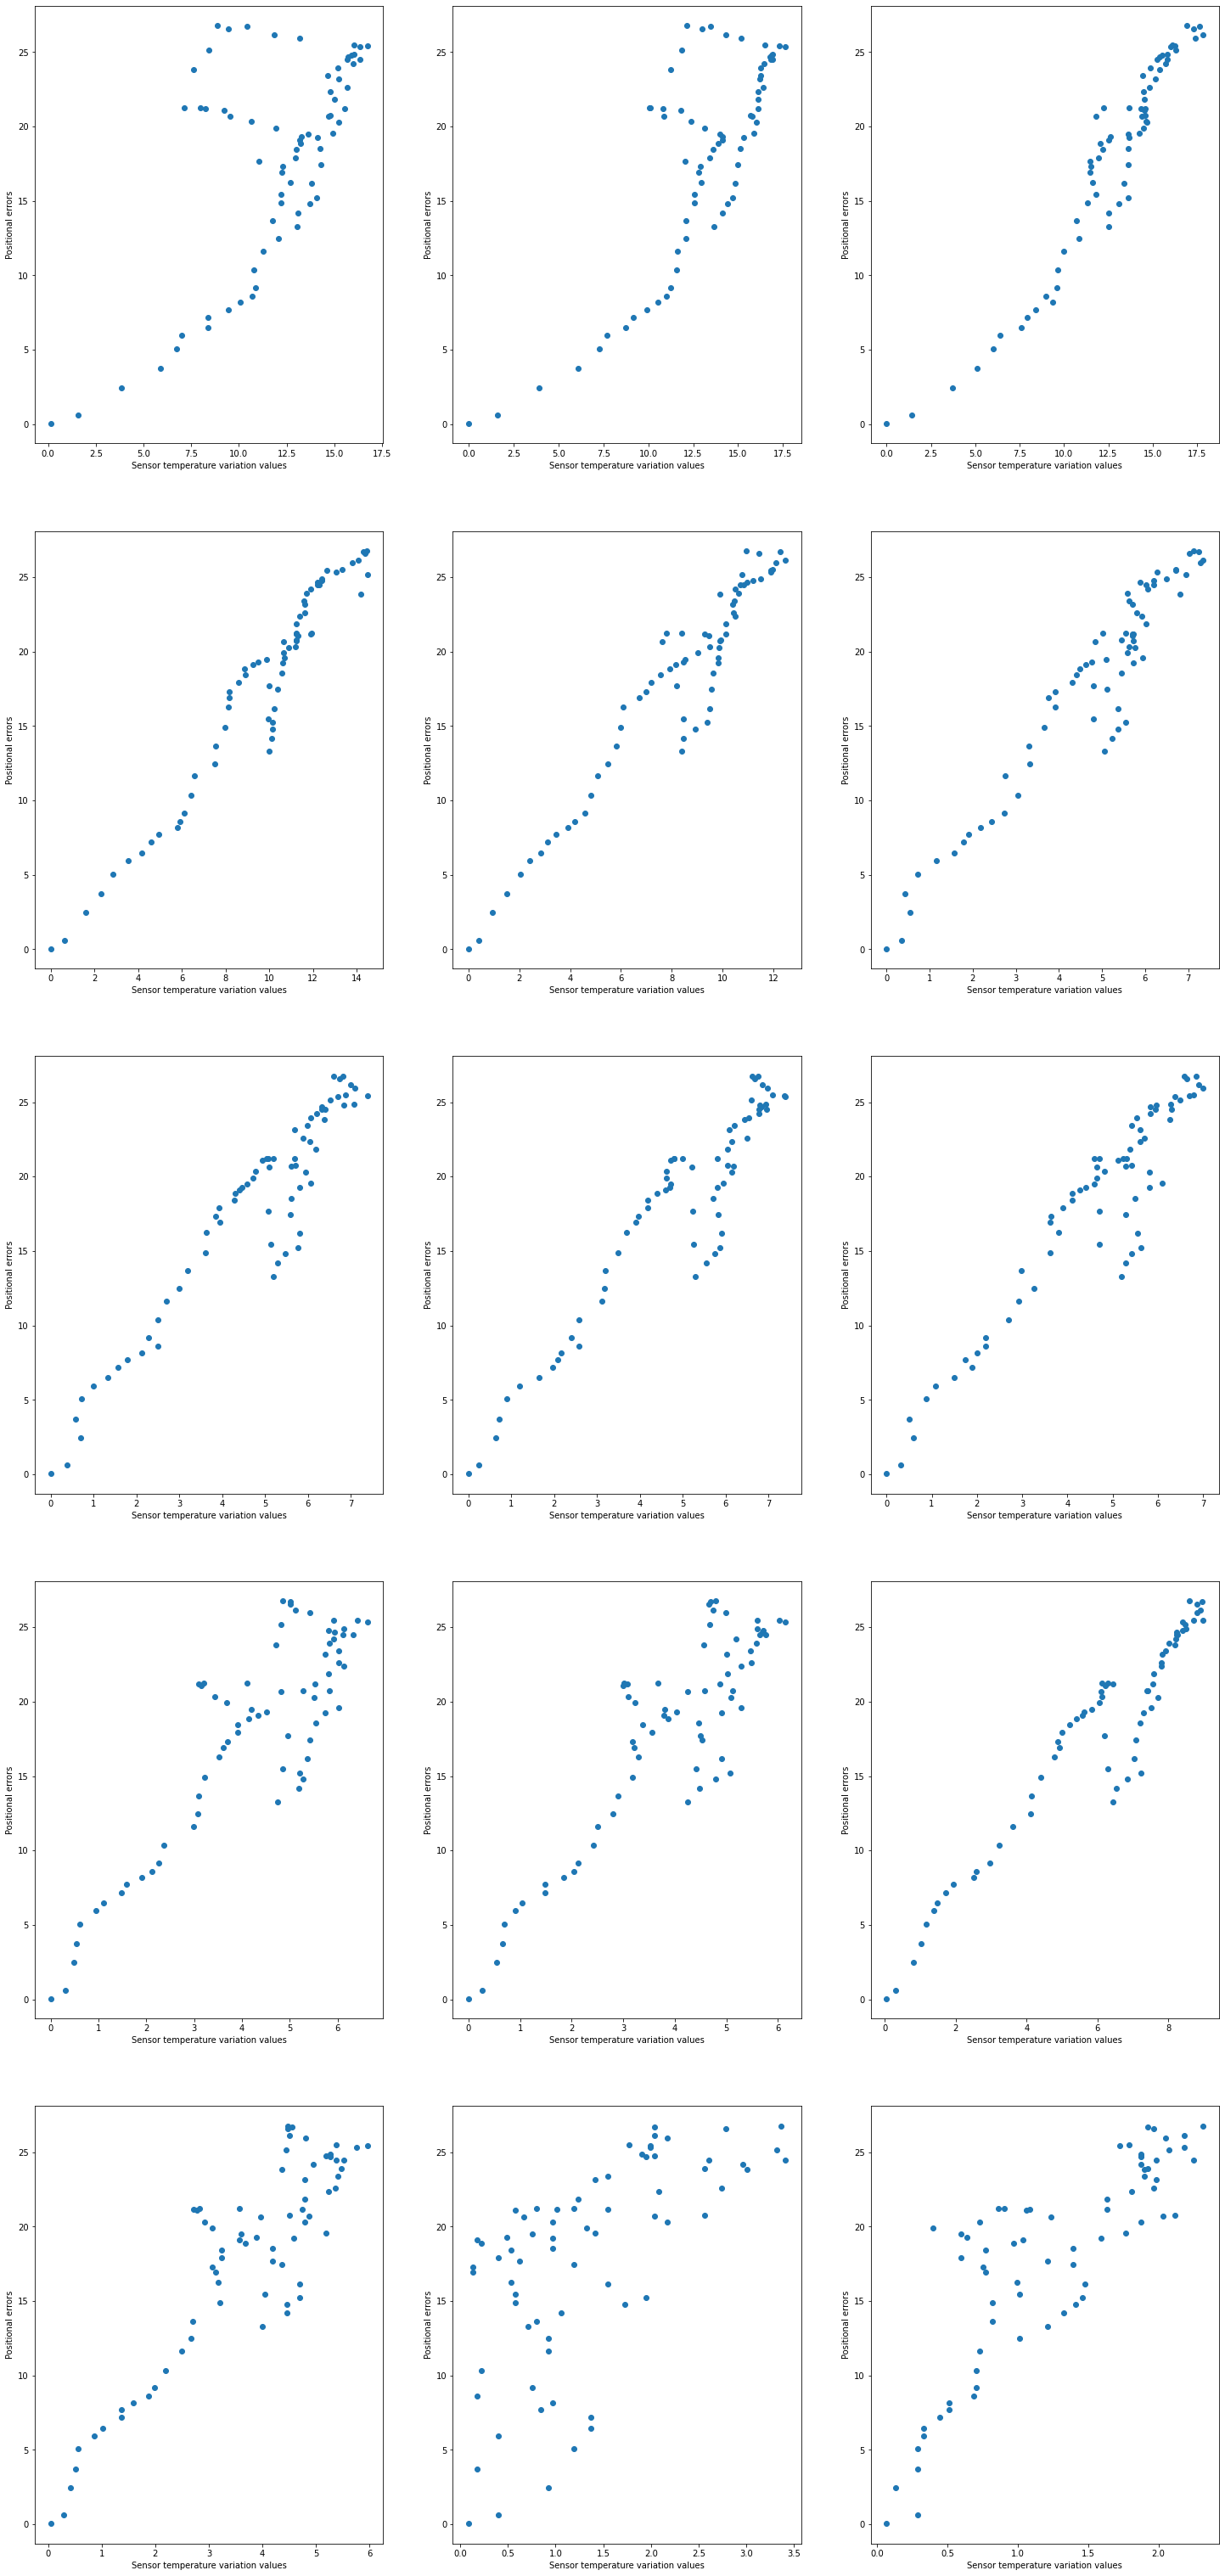

In [ ]:
plt.figure(figsize=(25,55))
for i in range(15):
  plt.subplot(5, 3, i + 1)
  plt.scatter(df1[i+1],y,)
  plt.xlabel('Sensor temperature variation values')
  plt.ylabel('Positional errors')

In [ ]:
import timeit
start = timeit.default_timer()


#Now Using first 5 sensors only

reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train[:,0:5], y_train)

# Make predictions using the testing set
y_pred_first5 = reg.predict(X_test[:,0:5])


stop = timeit.default_timer()
print('Time: ', stop - start)

y_pred_first5

Time:  0.0010756870033219457


array([ 2.15178135, 19.49669081, 21.33959475, 16.17914571, 16.31551043,
       13.08718438, 11.37829772, 18.75134906, 27.73245373, 17.50221044,
       24.67545462,  4.40708722, 23.37355518, 21.4011871 , 27.66263174,
       20.7875044 , 25.78513571, 14.12382939, 19.94625428, 21.39660038,
       18.79480694])

In [ ]:
y_test

array([ 2.459, 15.226, 23.406, 18.441, 18.867, 13.665, 11.632, 19.482,
       26.149, 17.685, 25.44 ,  5.06 , 24.778, 22.366, 26.716, 20.711,
       25.156, 16.266, 19.245, 21.089, 21.231])

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_first5))

Mean squared error: 2.57


This clearly shows we do not require all 15 dimensions(sensors), using only first 5 would give better results!

Another beautiful method to choose the most useful 5 or 6 sensors through clustering based on correlation

In [ ]:
df1.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,1.000000,0.968485,0.718261,0.622147,0.730066,0.651168,0.708134,0.744505,0.691249,0.844082,0.829502,0.708757,0.829957,0.341901,0.639990
2,0.968485,1.000000,0.861207,0.785907,0.860710,0.802997,0.838351,0.864254,0.828655,0.915146,0.909225,0.840624,0.908238,0.467531,0.758112
3,0.718261,0.861207,1.000000,0.978032,0.972938,0.973074,0.952374,0.947979,0.962769,0.876563,0.891771,0.957582,0.887613,0.643839,0.836836
4,0.622147,0.785907,0.978032,1.000000,0.973335,0.988922,0.970407,0.960432,0.975980,0.875695,0.893531,0.972351,0.888744,0.654988,0.851088
5,0.730066,0.860710,0.972938,0.973335,1.000000,0.985781,0.988133,0.984911,0.987551,0.934868,0.944721,0.990955,0.941331,0.634639,0.875725
6,0.651168,0.802997,0.973074,0.988922,0.985781,1.000000,0.983729,0.970820,0.990581,0.900009,0.912870,0.983701,0.909085,0.640455,0.854883
7,0.708134,0.838351,0.952374,0.970407,0.988133,0.983729,1.000000,0.993567,0.992391,0.947837,0.959015,0.995525,0.955843,0.649114,0.890956
8,0.744505,0.864254,0.947979,0.960432,0.984911,0.970820,0.993567,1.000000,0.986410,0.965113,0.975236,0.993409,0.972336,0.677402,0.909938
9,0.691249,0.828655,0.962769,0.975980,0.987551,0.990581,0.992391,0.986410,1.000000,0.931013,0.942613,0.991880,0.939764,0.658734,0.885860
10,0.844082,0.915146,0.876563,0.875695,0.934868,0.900009,0.947837,0.965113,0.931013,1.000000,0.992908,0.947909,0.993236,0.575221,0.877444


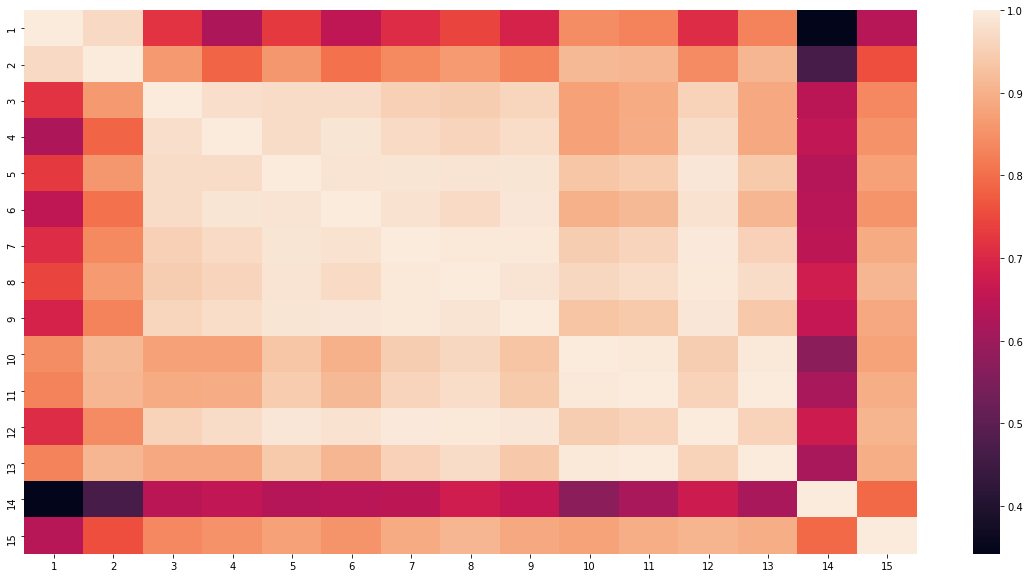

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr())

In [ ]:
import scipy.cluster.hierarchy as sci

corr = df1.corr().values

pd = sci.distance.pdist(corr)
linkage = sci.linkage(pd, method='complete')
id = sci.fcluster(linkage, 0.2 * pd.max(), 'distance')
id

array([4, 5, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 6, 3], dtype=int32)

In [ ]:
X_train

array([[ 6.996,  7.713,  6.38 ,  3.548,  2.401,  1.147,  0.996,  1.191,
         1.084,  0.956,  0.903,  1.391,  0.861,  0.398,  0.331],
       [ 1.57 ,  1.614,  1.434,  0.645,  0.394,  0.358,  0.391,  0.231,
         0.32 ,  0.301,  0.265,  0.309,  0.287,  0.398,  0.287],
       [ 0.135,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.044,  0.044,  0.088,  0.066],
       [13.184, 14.126, 12.509,  9.247,  8.172,  4.624,  4.409,  4.604,
         4.284,  4.336,  3.788,  5.563,  3.576,  0.177,  1.038],
       [ 9.462,  9.91 ,  8.423,  4.946,  3.441,  1.9  ,  1.796,  2.08 ,
         1.742,  1.593,  1.487,  1.921,  1.369,  0.841,  0.508],
       [15.247, 16.009, 14.695, 10.896,  9.857,  5.771,  5.938,  6.151,
         5.813,  5.504,  5.097,  7.704,  4.79 ,  2.168,  1.876],
       [ 5.874,  6.099,  5.125,  2.294,  1.505,  0.43 ,  0.587,  0.711,
         0.498,  0.531,  0.655,  1.015,  0.508,  0.177,  0.287],
       [16.009, 16.457, 15.735, 11.9  , 1

In [ ]:
import timeit
start = timeit.default_timer()

#Now take 1 from each cluster and run Linear Regression on it and find MSE

X2=df1[[1,2,3,10,14,15]]

from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X2, y, test_size=0.3)
X_train_red


reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train_red, y_train_red)

stop = timeit.default_timer()
print('Time: ', stop - start)

# Make predictions using the testing set
y_pred_red = reg.predict(X_test_red)
y_pred_red

Time:  0.0037843379977857694


array([20.99052785, 20.79619224,  4.09537639, 22.8670051 , 18.52698085,
        4.08681765, 17.67141816, 18.62151256, 19.53283594, 28.27494138,
       10.0749023 , 21.83201987, 19.94089983, 21.94632923, 26.93180934,
       21.05770634, 21.4551419 , 10.91867404, 21.57572074, 23.09679744,
       21.8196756 ])

In [ ]:
y_test_red

array([20.664,  5.06 , 23.17 , 21.846,  0.047, 11.632, 24.872, 25.487,
       20.711, 23.926, 26.149,  6.478, 19.907, 19.245, 14.186, 21.184,
       22.602, 21.231, 18.867, 23.406, 13.665])

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test_red, y_pred_red))

Mean squared error: 3.47


Neural Network on all 15 sensors

In [ ]:
X_train[:,0]

array([ 6.996,  1.57 ,  0.135, 13.184,  9.462, 15.247,  5.874, 16.009,
       12.197, 14.798, 13.049,  8.386, 12.197, 13.184,  8.251,  9.462,
       14.305, 12.287, 16.323,  8.879, 13.094,  9.552,  8.386, 12.063,
       15.022, 15.74 , 11.928, 14.26 , 16.054, 13.812, 16.323,  7.623,
       15.695, 15.202, 10.628, 10.762, 10.09 , 13.722, 10.852, 15.561,
       15.695, 16.054,  7.13 , 12.96 , 10.673, 14.933, 12.242, 13.274,
       15.247])

In [ ]:
X_train

array([[ 6.996,  7.713,  6.38 ,  3.548,  2.401,  1.147,  0.996,  1.191,
         1.084,  0.956,  0.903,  1.391,  0.861,  0.398,  0.331],
       [ 1.57 ,  1.614,  1.434,  0.645,  0.394,  0.358,  0.391,  0.231,
         0.32 ,  0.301,  0.265,  0.309,  0.287,  0.398,  0.287],
       [ 0.135,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.044,  0.044,  0.088,  0.066],
       [13.184, 14.126, 12.509,  9.247,  8.172,  4.624,  4.409,  4.604,
         4.284,  4.336,  3.788,  5.563,  3.576,  0.177,  1.038],
       [ 9.462,  9.91 ,  8.423,  4.946,  3.441,  1.9  ,  1.796,  2.08 ,
         1.742,  1.593,  1.487,  1.921,  1.369,  0.841,  0.508],
       [15.247, 16.009, 14.695, 10.896,  9.857,  5.771,  5.938,  6.151,
         5.813,  5.504,  5.097,  7.704,  4.79 ,  2.168,  1.876],
       [ 5.874,  6.099,  5.125,  2.294,  1.505,  0.43 ,  0.587,  0.711,
         0.498,  0.531,  0.655,  1.015,  0.508,  0.177,  0.287],
       [16.009, 16.457, 15.735, 11.9  , 1

In [ ]:
import timeit
start = timeit.default_timer()

from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='relu',kernel_initializer='normal', input_dim=15))
model.add(Dense(5, activation='relu',kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(optimizer ='adam',loss='mean_squared_error')

#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#X_val = np.asarray(X_val)
#y_val = np.asarray(y_val)

model.fit(X_train,y_train, batch_size=10, epochs=100)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 377.0142
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 376.0212
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 337.0879
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 378.7785
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 324.1156
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 389.6213
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 339.8344
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 361.9981
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 341.8815
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 348.6995
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 296.9312
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 332.9491
Epoch 13/100
5/5 [===================

In [ ]:
y_pred_nn = model.predict(X_test)
y_pred_nn

array([[ 3.8526704],
       [20.613281 ],
       [22.127821 ],
       [16.649534 ],
       [17.014406 ],
       [13.964733 ],
       [12.863252 ],
       [18.199646 ],
       [23.990398 ],
       [17.696398 ],
       [24.99674  ],
       [ 6.1106462],
       [23.646654 ],
       [22.238787 ],
       [23.481024 ],
       [21.635578 ],
       [22.347132 ],
       [15.417897 ],
       [20.863571 ],
       [17.930565 ],
       [16.90437  ]], dtype=float32)

In [ ]:
y_test

array([ 2.459, 15.226, 23.406, 18.441, 18.867, 13.665, 11.632, 19.482,
       26.149, 17.685, 25.44 ,  5.06 , 24.778, 22.366, 26.716, 20.711,
       25.156, 16.266, 19.245, 21.089, 21.231])

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_nn))

Mean squared error: 4.81


NN on first 5

In [ ]:
import timeit
start = timeit.default_timer()

from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='relu',kernel_initializer='normal', input_dim=5))
model.add(Dense(5, activation='relu',kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(optimizer ='adam',loss='mean_squared_error')

#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#X_val = np.asarray(X_val)
#y_val = np.asarray(y_val)

model.fit(X_train[:,0:5],y_train, batch_size=10, epochs=100)

stop = timeit.default_timer()
print('Time: ', stop - start)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 363.4764
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 358.7742
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 371.9974
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 350.9427
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 348.5131
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 366.6351
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 322.4471
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 301.8098
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 320.1141
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 297.1308
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 311.2566
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 285.9443
Epoch 13/100
5/5 [===================

In [ ]:
y_pred_nn_first5 = model.predict(X_test[:,0:5])
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_nn_first5))

Mean squared error: 6.69


NN on chosen sensors after Correlation Clustering

In [ ]:
import timeit
start = timeit.default_timer()

from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu',kernel_initializer='normal', input_dim=6))
model.add(Dense(2, activation='relu',kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(optimizer ='adam',loss='mean_squared_error')

#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#X_val = np.asarray(X_val)
#y_val = np.asarray(y_val)

model.fit(X_train_red,y_train_red, batch_size=6, epochs=100)

stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
y_pred_nn_red = model.predict(X_test_red)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_nn_red))

Mean squared error: 45.96


Polynomial Regression

In [ ]:
X_train[:,0]

array([ 6.996,  1.57 ,  0.135, 13.184,  9.462, 15.247,  5.874, 16.009,
       12.197, 14.798, 13.049,  8.386, 12.197, 13.184,  8.251,  9.462,
       14.305, 12.287, 16.323,  8.879, 13.094,  9.552,  8.386, 12.063,
       15.022, 15.74 , 11.928, 14.26 , 16.054, 13.812, 16.323,  7.623,
       15.695, 15.202, 10.628, 10.762, 10.09 , 13.722, 10.852, 15.561,
       15.695, 16.054,  7.13 , 12.96 , 10.673, 14.933, 12.242, 13.274,
       15.247])

In [ ]:
import timeit
start = timeit.default_timer()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.01660974299738882


In [ ]:
y_pred_lin=lin_reg.predict(X_test)
# Predicting a new result with Polymonial Regression
y_pred_poly=pol_reg.predict(poly_reg.fit_transform(X_test))
y_pred_poly

array([ 2.2834229 , 17.15119315, 23.20856834, 16.26975135, 16.45771219,
       12.07560442, 14.14706895, 20.26814796, 30.82674774, 15.85532802,
       23.61279125,  4.42657597, 26.68715072, 22.68009587, 30.06993318,
       20.42438251, 29.31923635, 15.89430274, 18.34042432, 16.49234431,
       23.37244115])

In [ ]:
y_test

array([ 2.459, 15.226, 23.406, 18.441, 18.867, 13.665, 11.632, 19.482,
       26.149, 17.685, 25.44 ,  5.06 , 24.778, 22.366, 26.716, 20.711,
       25.156, 16.266, 19.245, 21.089, 21.231])

In [ ]:
print('Mean squared error for Polynomial Regression: %.2f' % mean_squared_error(y_test, y_pred_poly))
print('Mean squared error for Linear Regression: %.2f' % mean_squared_error(y_test, y_pred_lin))

Mean squared error for Polynomial Regression: 5.32
Mean squared error for Linear Regression: 2.62


Looks like it is somewhat overfitting here (data is less and we are using 3rd order polynomial to predict)

Polynomial Regression on chosen sensors: First 5

In [ ]:
import timeit
start = timeit.default_timer()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train[:,0:5])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0:5], y_train)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.0027099420040030964


In [ ]:
y_pred_lin=lin_reg.predict(X_test[:,0:5])
# Predicting a new result with Polymonial Regression
y_pred_poly_first5=pol_reg.predict(poly_reg.fit_transform(X_test[:,0:5]))

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_poly_first5))

Mean squared error: 7.37


Polynomial Regression on chosen sensors: through Correlation Clustering

In [ ]:
import timeit
start = timeit.default_timer()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train_red)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train_red)

lin_reg = LinearRegression()
lin_reg.fit(X_train_red, y_train_red)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.0042393769981572405


In [ ]:
y_pred_lin=lin_reg.predict(X_test_red)
# Predicting a new result with Polymonial Regression
y_pred_poly_red=pol_reg.predict(poly_reg.fit_transform(X_test_red))

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_poly_red))

Mean squared error: 45.70


Final comparison

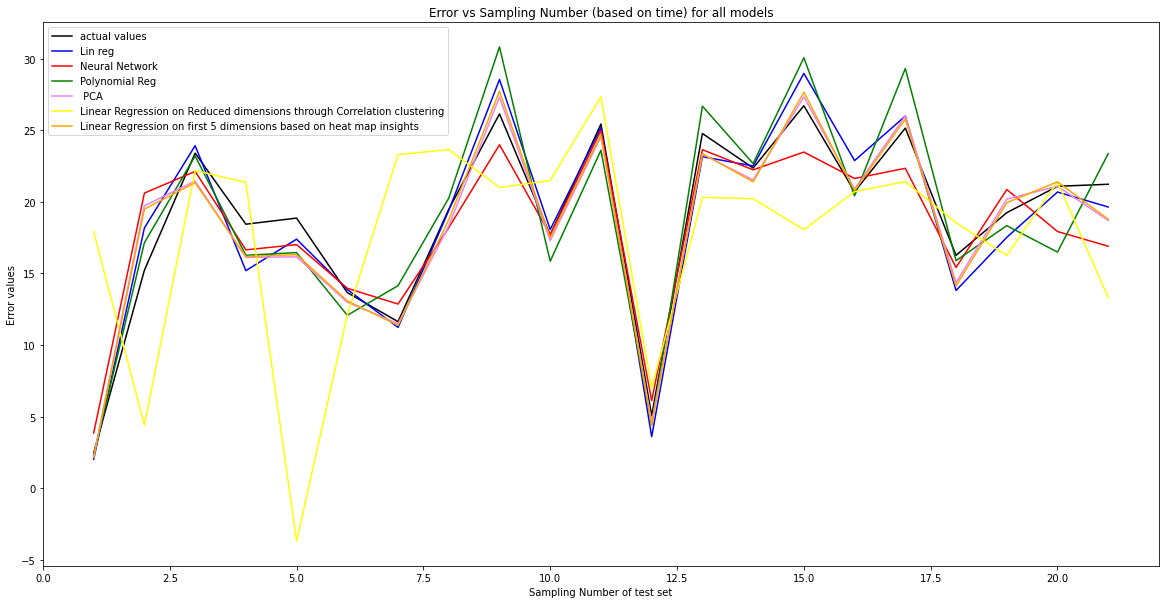

In [ ]:
x=np.arange(1,22,1)

plt.figure(figsize=(20,10))

plt.plot(x, y_test, color='black', label='actual values')       #actual values
plt.plot(x, y_pred, color='blue', label='Lin reg')        #predicted through lin reg
plt.plot(x, y_pred_nn, color='red', label='Neural Network')      #predicted through NN
plt.plot(x, y_pred_poly, color='green', label='Polynomial Reg')  #predicted through poly reg
plt.plot(x, y_pred_pca, color='violet', label=' PCA')  #predicted through PCA
plt.plot(x, y_pred_red, color='yellow', label='Linear Regression on Reduced dimensions through Correlation clustering')  #predicted through Linear Regression on Reduced dimensions through Correlation clustering
plt.plot(x, y_pred_first5, color='orange', label='Linear Regression on first 5 dimensions based on heat map insights')  #predicted through Linear Regression on first 5 dimensions based on heat map insights

#plt.plot(x, y_pred_nn_first5, color='orange', label='Neural Network on first 5 dimensions based on heat map insights')  #predicted through Neural Network on first 5 dimensions based on heat map insights
#plt.plot(x, y_pred_nn_red, color='blue', label='Neural Network on Reduced dimensions through Correlation clustering')  #predicted through Neural Network on Reduced dimensions through Correlation clustering
#plt.plot(x, y_pred_poly_first5, color='red', label='Polynomial Regression on first 5 dimensions based on heat map insights')  #predicted through Polynomial Regression on first 5 dimensions based on heat map insights
#plt.plot(x, y_pred_poly_red, color='green', label=' Polynomial Regression on Reduced dimensions through Correlation clustering')  #predicted through Polynomial Regression on Reduced dimensions through Correlation clustering

plt.title("Error vs Sampling Number (based on time) for all models")
plt.xlabel("Sampling Number of test set")
plt.ylabel("Error values")
plt.legend()
plt.show()

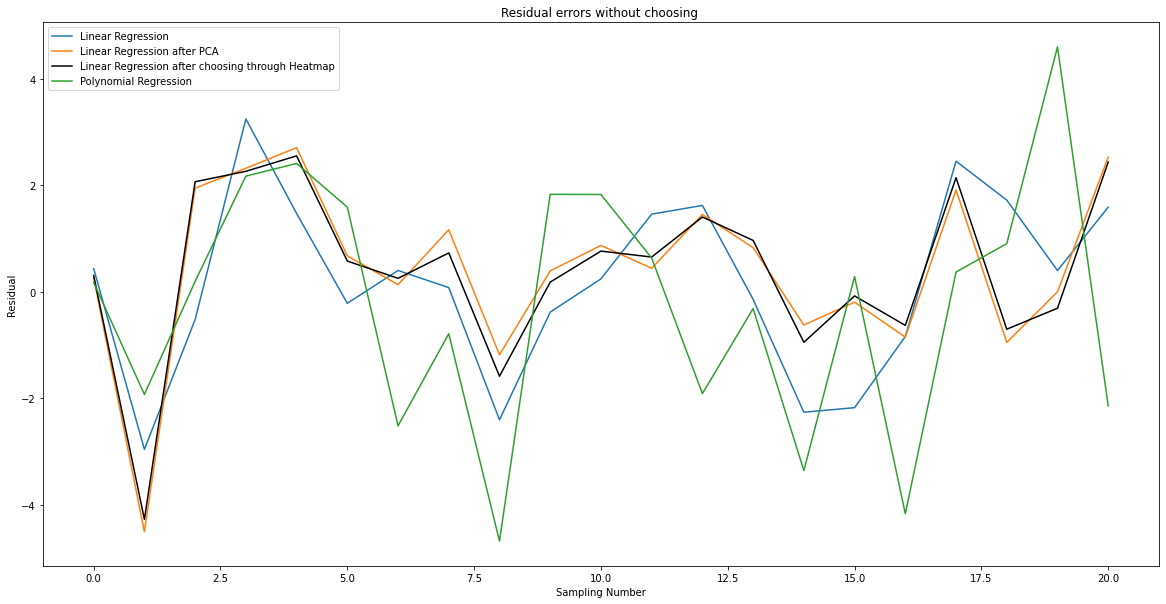

In [ ]:
plt.figure(figsize=(20,10))

res_linreg= y_test-y_pred
res_pca= y_test-y_pred_pca
res_nn= y_test-y_pred_nn
res_polyreg= y_test-y_pred_poly
res_linreg_first5=y_test-y_pred_first5

#res_linreg= y_test-y_pred

plt.plot(res_linreg, label='Linear Regression')
plt.plot(res_pca, label='Linear Regression after PCA')
#plt.plot(res_nn)
plt.plot(res_linreg_first5, label='Linear Regression after choosing through Heatmap',color='black')
plt.plot(res_polyreg, label='Polynomial Regression')

plt.title("Residual errors without choosing ")
plt.xlabel("Sampling Number")
plt.ylabel("Residual")
plt.legend()
plt.show()